<a href="https://colab.research.google.com/github/MayurNaktode/Lumpy-Skin-Disease---EDA---Predication/blob/main/Lumpy_Skin_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Import Required Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from shapely.geometry import Point
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
## Common Function

## To Plot the chart between independent and Target Feature
def plotChart(dataset,CTarget_0_1,IndepFeature):
    plt.style.use('dark_background')
    plt.figure(figsize=(20,5))
    plt.subplot(1,2,1)
    sns.distplot(df_lumpy[df_lumpy[CTarget_0_1]==0][IndepFeature],label='Not Suffered By Lumpy',hist=False,color='green')
    sns.distplot(df_lumpy[df_lumpy[CTarget_0_1]==1][IndepFeature],label="Suffered By Lumpy",hist=False,color='red')
    plt.grid(True)
    plt.legend()
    plt.show()

def plotGraph(dataset,feature):
    plt.style.use('Solarize_Light2')
    plt.figure(figsize=(15,10))
    plt.subplot(2,2,1)
    plt.title(f'{feature} Distribution Graph')
    sns.distplot(dataset[feature],color="red")

    plt.subplot(2,2,2)
    plt.title(f'{feature} Histogram Graph',color="red")
    sns.histplot(dataset[feature],color='red',kde=True,bins=10)

    plt.subplot(2,2,3)
    plt.title(f'{feature} BoxPlot')
    sns.boxplot(dataset[feature],color="red")
    plt.show()    

In [ ]:
## Import Data from CSV

In [ ]:
df_lumpy = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Projects/Lumpy /Lumpy skin disease data.csv")

In [ ]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [ ]:
## Check data whether it loads or not
df_lumpy.head()

,x,y,region,country,reportingDate,cld,dtr,frs,pet,pre,tmn,tmp,tmx,vap,wet,elevation,dominant_land_cover,X5_Ct_2010_Da,X5_Bf_2010_Da,lumpy
0,90.380931,22.437184,Asia,Bangladesh,10/9/2020,41.6,12.8,0.00,2.3,1.7,12.7,19.1,25.5,15.7,0.00,147,2,27970.983100,3691.746950,1
1,87.854975,22.986757,Asia,India,20/12/2019,40.5,13.3,0.00,2.4,0.0,13.2,19.8,26.5,16.3,0.00,145,2,25063.646690,671.326701,1
2,85.279935,23.610181,Asia,India,20/12/2019,27.3,13.6,0.08,2.3,0.6,9.4,16.2,23.0,13.0,0.98,158,2,6038.477155,1426.839831,1
3,81.564510,43.882221,Asia,China,25/10/2019,45.3,12.8,31.00,0.4,8.8,-22.5,-16.1,-9.7,0.9,4.64,178,2,760.703340,0.000000,1
4,81.161057,43.834976,Asia,China,25/10/2019,38.8,13.2,31.00,0.4,10.5,-20.4,-13.8,-7.2,1.2,1.69,185,3,270.367426,0.000000,1


In [ ]:
df_lumpy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24803 entries, 0 to 24802
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   x                    24803 non-null  float64
 1   y                    24803 non-null  float64
 2   region               3039 non-null   object 
 3   country              3039 non-null   object 
 4   reportingDate        3039 non-null   object 
 5   cld                  24803 non-null  float64
 6   dtr                  24803 non-null  float64
 7   frs                  24803 non-null  float64
 8   pet                  24803 non-null  float64
 9   pre                  24803 non-null  float64
 10  tmn                  24803 non-null  float64
 11  tmp                  24803 non-null  float64
 12  tmx                  24803 non-null  float64
 13  vap                  24803 non-null  float64
 14  wet                  24803 non-null  float64
 15  elevation            24803 non-null 

In [ ]:
### Dataset details
# 1.data loads successfully
# 2.In the dataset we have total 24803 data-points and 19 dependent features and 1 independent/Target feature. (While data pre-processing we will ignore some of the unwanted features depends on the analysis)
# 3.Here we have 3 types of data (int,float and object/categorical)
# 4. 14 features have float type , 2 features have int type and 3 are object / categorical type data.
# 5. the data acquire 3.8+ MB machine memory.
# 6.The x and y feature looks like it is Latitude and Longitude geocoded. For better understanding, let rename the columns/features x to Longitude and y to Latitude.

<h2> Check for Duplicate datapoints </h2>

In [ ]:
df_lumpy.duplicated().sum()

608

In [ ]:
## Here we have total 608 data points which is duplicate

In [ ]:
## Let's Remove the duplicate data points
df_lumpy= df_lumpy.drop_duplicates()

In [ ]:
df_lumpy.shape

(24195, 20)

In [ ]:
df_lumpy.head()

,x,y,region,country,reportingDate,cld,dtr,frs,pet,pre,tmn,tmp,tmx,vap,wet,elevation,dominant_land_cover,X5_Ct_2010_Da,X5_Bf_2010_Da,lumpy
0,90.380931,22.437184,Asia,Bangladesh,10/9/2020,41.6,12.8,0.00,2.3,1.7,12.7,19.1,25.5,15.7,0.00,147,2,27970.983100,3691.746950,1
1,87.854975,22.986757,Asia,India,20/12/2019,40.5,13.3,0.00,2.4,0.0,13.2,19.8,26.5,16.3,0.00,145,2,25063.646690,671.326701,1
2,85.279935,23.610181,Asia,India,20/12/2019,27.3,13.6,0.08,2.3,0.6,9.4,16.2,23.0,13.0,0.98,158,2,6038.477155,1426.839831,1
3,81.564510,43.882221,Asia,China,25/10/2019,45.3,12.8,31.00,0.4,8.8,-22.5,-16.1,-9.7,0.9,4.64,178,2,760.703340,0.000000,1
4,81.161057,43.834976,Asia,China,25/10/2019,38.8,13.2,31.00,0.4,10.5,-20.4,-13.8,-7.2,1.2,1.69,185,3,270.367426,0.000000,1


In [ ]:
df_lumpy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24195 entries, 0 to 24802
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   x                    24195 non-null  float64
 1   y                    24195 non-null  float64
 2   region               2431 non-null   object 
 3   country              2431 non-null   object 
 4   reportingDate        2431 non-null   object 
 5   cld                  24195 non-null  float64
 6   dtr                  24195 non-null  float64
 7   frs                  24195 non-null  float64
 8   pet                  24195 non-null  float64
 9   pre                  24195 non-null  float64
 10  tmn                  24195 non-null  float64
 11  tmp                  24195 non-null  float64
 12  tmx                  24195 non-null  float64
 13  vap                  24195 non-null  float64
 14  wet                  24195 non-null  float64
 15  elevation            24195 non-null 

In [ ]:
# Rename the features
df_lumpy.rename(columns={"x":"Longitude" , "y":"Latitude"},inplace=True,errors="raise")

In [ ]:
geolocation = df_lumpy[['Latitude','Longitude','country']]
geolocation.head()

,Latitude,Longitude,country
0,22.437184,90.380931,Bangladesh
1,22.986757,87.854975,India
2,23.610181,85.279935,India
3,43.882221,81.564510,China
4,43.834976,81.161057,China


In [ ]:
fig = px.scatter_geo(geolocation,lat='Latitude',lon='Longitude')
fig.update_layout(title = 'Lumpy Skin Disease Area', title_x=0.5)
fig.show()

In [ ]:
# 1.Above we plot the the map using Latitude and Longitude geocode. The blue area in map show that the spread Lumpy disease.
# 2.we can see that the disease are in almost all the countries.

### Exploratory Data Analysis

In [ ]:
## Check the Data describtion
df_lumpy.describe()

,Longitude,Latitude,cld,dtr,frs,pet,pre,tmn,tmp,tmx,vap,wet,elevation,dominant_land_cover,X5_Ct_2010_Da,X5_Bf_2010_Da,lumpy,Year,Month
count,24195.000000,24195.000000,24195.000000,24195.000000,24195.000000,24195.000000,24195.000000,24195.000000,24195.000000,24195.000000,24195.000000,24195.000000,24195.000000,24195.000000,24195.000000,24195.000000,24195.000000,2431.000000,2431.000000
mean,80.481799,46.589472,59.208758,9.148775,24.230508,0.793151,24.938859,-16.231928,-11.643703,-7.077462,3.644894,8.475692,164.813598,4.444844,618.578457,173.978322,0.100475,2016.000000,6.861374
std,43.068859,19.376367,19.502036,3.006721,11.401773,1.181585,32.389637,17.554205,17.983279,18.560696,4.957740,6.245814,19.712574,2.416406,2302.448600,1140.246573,0.300639,1.488225,2.736605
min,-179.750000,-28.750000,0.000000,2.000000,0.000000,0.000000,0.000000,-52.100000,-48.100000,-44.200000,0.000000,0.000000,66.000000,0.000000,0.000000,0.000000,0.000000,2011.000000,1.000000
25%,46.750000,35.250000,43.400000,6.800000,23.800000,0.000000,5.700000,-30.600000,-26.000000,-21.200000,0.400000,2.880000,152.000000,3.000000,2.390413,0.000000,0.000000,2016.000000,5.000000
50%,81.750000,49.250000,62.100000,8.300000,31.000000,0.200000,14.200000,-19.800000,-14.700000,-10.300000,1.400000,7.880000,161.000000,4.000000,37.428863,0.000207,0.000000,2016.000000,7.000000
75%,110.750000,62.250000,75.000000,11.200000,31.000000,1.000000,31.500000,-2.700000,1.000000,4.400000,4.700000,12.690000,176.000000,4.000000,340.879526,0.002167,0.000000,2016.000000,9.000000
max,179.750000,81.750000,98.700000,20.600000,31.000000,7.500000,341.900000,23.900000,28.500000,36.400000,28.600000,30.920000,249.000000,11.000000,167388.672700,56654.780150,1.000000,2021.000000,12.000000


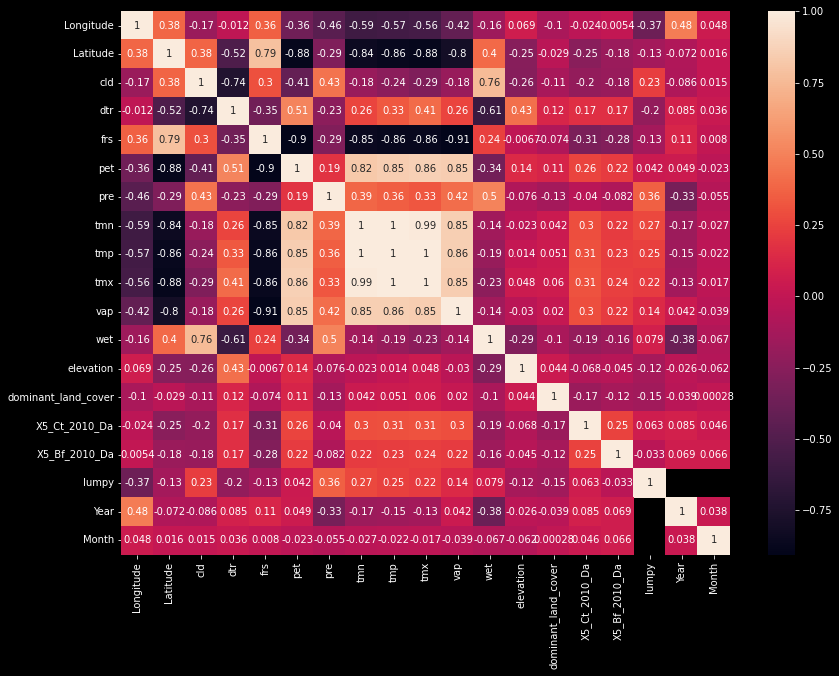

In [ ]:
## Check the co-rrelation 
plt.figure(figsize=(30,10))
plt.subplot(121)
sns.heatmap(df_lumpy.corr(),annot=True)
plt.show()

## Univarient Data Analysis

In [ ]:
df_lumpy.head()
#df_lumpy.style.highlight_null(null_color='red')

,Longitude,Latitude,region,country,reportingDate,cld,dtr,frs,pet,pre,tmn,tmp,tmx,vap,wet,elevation,dominant_land_cover,X5_Ct_2010_Da,X5_Bf_2010_Da,lumpy
0,90.380931,22.437184,Asia,Bangladesh,10/9/2020,41.6,12.8,0.00,2.3,1.7,12.7,19.1,25.5,15.7,0.00,147,2,27970.983100,3691.746950,1
1,87.854975,22.986757,Asia,India,20/12/2019,40.5,13.3,0.00,2.4,0.0,13.2,19.8,26.5,16.3,0.00,145,2,25063.646690,671.326701,1
2,85.279935,23.610181,Asia,India,20/12/2019,27.3,13.6,0.08,2.3,0.6,9.4,16.2,23.0,13.0,0.98,158,2,6038.477155,1426.839831,1
3,81.564510,43.882221,Asia,China,25/10/2019,45.3,12.8,31.00,0.4,8.8,-22.5,-16.1,-9.7,0.9,4.64,178,2,760.703340,0.000000,1
4,81.161057,43.834976,Asia,China,25/10/2019,38.8,13.2,31.00,0.4,10.5,-20.4,-13.8,-7.2,1.2,1.69,185,3,270.367426,0.000000,1


In [ ]:
## 1.region
df_lumpy['region'].value_counts()

Europe    1809
Asia       538
Africa      84
Name: region, dtype: int64

In [ ]:
## From above values Count function we can say that,
# 1.there are 3 region where that Lumpy skin disease spreads.
# 2.From 3 regions
    # 1.On First place Europen Countries (2172) are highly suffered from Lumpy Skin Disease.
    # 2.On Second place Asian Countries (777)  are suffered from Lumpy Skin Disease. 
    # 3.On Third place African Countries (90)  are suffered from Lumpy Skin Disease. 
# 3.So Europen Countriers are quite not safe for animals and Countries should take the appropriate action.    

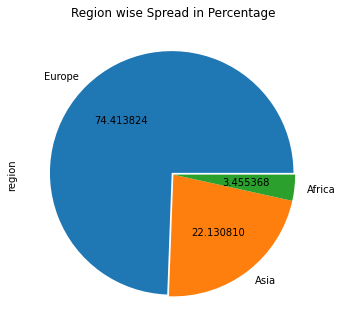

In [ ]:
plt.figure(figsize=(12,40))
plt.subplot(121)
df_lumpy['region'].value_counts().plot.pie(autopct="%2f",explode=(0.02,0,0),title = "Region wise Spread in Percentage")
plt.show()

### 2.Country

In [ ]:
df_lumpy['country'].nunique()
# 1.There are total 37 country who are suffered by Lumy Skin Disease which are belongs to 

37

In [ ]:
pd.DataFrame(df_lumpy['country'].unique())

,0
0,Bangladesh
1,India
2,China
3,Israel
4,Russian Federation
5,West Bank
6,Syrian Arab Republic
7,Georgia
8,Namibia
9,Montenegro


In [ ]:
## These are the countries in which the disease found

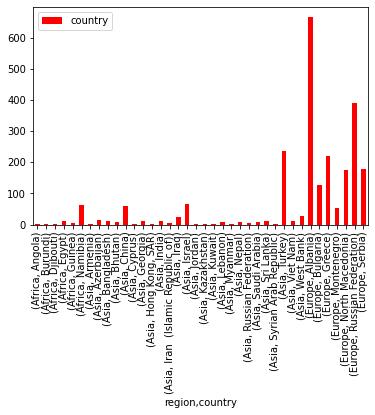

In [ ]:
pd.DataFrame(df_lumpy.groupby(['region','country'])['country'].count()).plot(kind="bar",color="red")

In [ ]:
pd.DataFrame(df_lumpy.groupby(['region','country'])['country'].count()).rename(columns={'country' : "CountryCount"}) ##.sort_values(by="CountryCount",ascending=False)

CountryCount
region country                                  
Africa Angola                                  1
       Burundi                                 2
       Djibouti                                1
       Egypt                                  10
       Guinea                                  6
       Namibia                                64
Asia   Armenia                                 1
       Azerbaijan                             16
       Bangladesh                             11
       Bhutan                                  7
       China                                  61
       Cyprus                                  2
       Georgia                                10
       Hong Kong, SAR                          1
       India                                  12
       Iran  (Islamic Republic of)             5
       Iraq                                   23
       Israel                                 66
       Jordan                                  2
       Kazakhstan                              2
       Kuwait                                  3
       Lebanon                                 7
       Myanmar                                 1
       Nepal                                   8
       Russian Federation                      4
       Saudi Arabia                            8
       Sri Lanka                              11
       Syrian Arab Republic                    3
       Turkey                                236
       Viet Nam                               10
       West Bank                              28
Europe Albania                               666
       Bulgaria                              127
       Greece                                220
       Montenegro                             52
       North Macedonia                       174
       Russian Federation                    390
       Serbia                                180

In [ ]:
## From above table
# 1. From Europe region Top 3 Countries those are higly suffered from Lump skin disease are :
     # 1.Albania - total 858  cases are reported.
     # 2.Russian Federation - total 395 cases are reported.
     # 3.Greece - total 226 - cases are reported.    
    
# 2. From Asian region Top 3 Countries those are higly suffered from Lump skin disease are :    
     # 1.Turkey - Total 237 cases are reported
     # 2.Israel -Total 233 cases are reported.
     # 3.China - Total 71 Cases are reported.   
    
# 3. From African regio Top 3 Countries those are highly suffered from Lump skin disease are :
    # 1.Namibia - Total 68 cases are reported.
    # 2.Egypt -Total 12 cases are reported.
    # 3.Guinea -Total 6 cases are reported.
    
## From above analysis we can say that these countries need to take immediate action.
   ## 1.If it doest not take any action then may be it spread and those animals also get suffered who are not in present time.
    
## Impact :
   ## 1.If they dont take any action they definaly it will spread and the animals will died and the population of animals (cow) would be decreased.
   ## 2.If they population would decrease then those countries would not able to get the milk and milk productions
   ## 3.beacuse of these they need to import it from other countries and then it would be very expensive and if this happends then it will directly impact on ecomomy.
    

## Reporting Date

In [ ]:
df_lumpy['reportingDate'] =pd.to_datetime(df_lumpy['reportingDate'])

In [ ]:
df_lumpy['Year'] = df_lumpy['reportingDate'].dt.year

In [ ]:
pd.DataFrame(df_lumpy['Year'].value_counts().sort_values(ascending=True)).rename(columns={"Year" : "Case Report Count"})

,Case Report Count
2011.0,6
2021.0,11
2012.0,21
2013.0,81
2020.0,83
2019.0,83
2018.0,94
2015.0,129
2017.0,212
2014.0,275


### 1.Year  Wise Cases

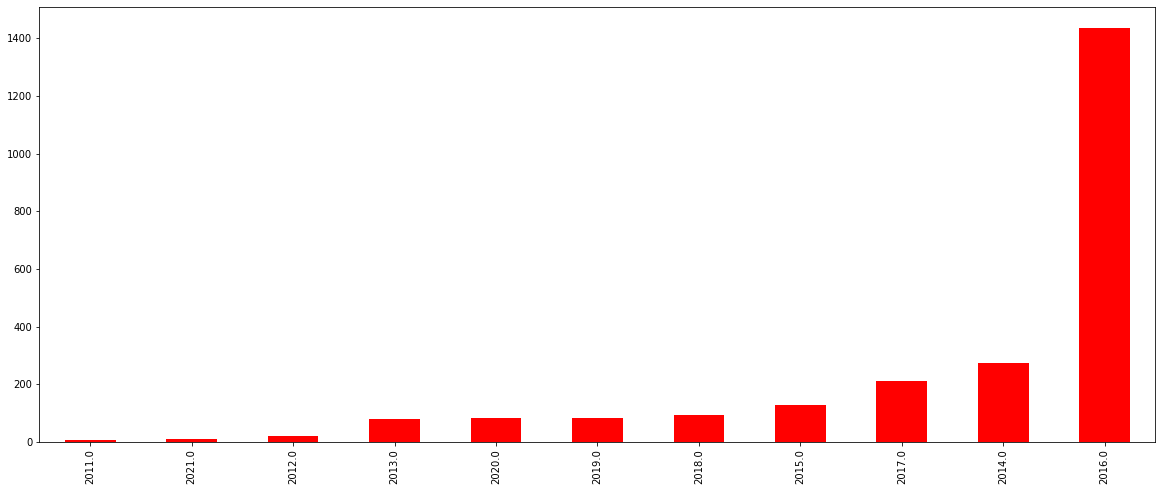

In [ ]:
plt.figure(figsize=(20,8))
df_lumpy[df_lumpy['Year'] == df_lumpy['Year']]['Year'].value_counts().sort_values(ascending=True).plot(kind="bar",color="red")

In [ ]:
## Obervations from reporting Date
 # 1.First report was registered in 2011.(Based on the data which we have we can say that the first case reported in 2011 year.Indirectly it was born in 2011)
 # 2.After 2011 we can see continuously the reportes were increasing every year.
 # 3.In 2016, the cases of this disease are very high and after 2016 its show like the cases counts were decreased.

In [ ]:
df_lumpy['Month'] = df_lumpy['reportingDate'].dt.month
df_lumpy['MonthTitle']= df_lumpy['reportingDate'].dt.month_name()

### 2. Year and Month Wise Cases

In [ ]:
pd.DataFrame(df_lumpy.groupby(['Year','Month'])['Month'].count()).rename(columns={'Month':'CaseCounts'})

CaseCounts
Year   Month            
2011.0 7.0             1
       10.0            3
       11.0            2
2012.0 5.0             2
       7.0             2
       8.0             4
       9.0             1
       10.0            3
       11.0            4
       12.0            5
2013.0 1.0             1
       2.0             3
       3.0            10
       4.0            32
       5.0             5
       7.0             4
       8.0             1
       9.0             4
       11.0           16
       12.0            5
2014.0 1.0            11
       2.0             4
       3.0            10
       4.0            50
       5.0            33
       6.0            31
       7.0            93
       8.0            13
       9.0             6
       10.0           19
       11.0            2
       12.0            3
2015.0 1.0             1
       2.0             6
       3.0             2
       4.0            10
       5.0             1
       8.0            16
       9.0            65
       10.0           28
2016.0 1.0            55
       2.0            46
       3.0            12
       4.0            93
       5.0           182
       6.0           187
       7.0           281
       8.0           146
       9.0           208
       10.0           92
       11.0           84
       12.0           50
2017.0 1.0            31
       2.0            12
       3.0            10
       4.0            14
       5.0            18
       6.0            33
       7.0            36
       8.0            33
       9.0             4
       10.0           10
       11.0            4
       12.0            7
2018.0 1.0            24
       3.0            15
       5.0             2
       7.0            23
       8.0             9
       9.0            11
       10.0            5
       11.0            3
       12.0            2
2019.0 3.0             2
       4.0             8
       6.0             3
       7.0            11
       8.0            12
       9.0            14
       10.0           22
       11.0            3
       12.0            8
2020.0 3.0             1
       4.0             1
       5.0             1
       6.0             2
       7.0            13
       8.0            27
       9.0             8
       10.0           13
       11.0            7
       12.0           10
2021.0 1.0            11

In [ ]:
df_lumpy.pivot_table(index=['Month','MonthTitle'],columns=['Year','region'],values=['lumpy'],aggfunc='count')

lumpy                                                        \
Year             2011.0 2012.0 2013.0       2014.0       2015.0        2016.0   
region           Africa   Asia Africa  Asia Africa  Asia   Asia Europe Africa   
Month MonthTitle                                                                
1.0   January       NaN    NaN    NaN   1.0    NaN  11.0    1.0    NaN    2.0   
2.0   February      NaN    NaN    NaN   3.0    NaN   4.0    NaN    6.0    NaN   
3.0   March         NaN    NaN    NaN  10.0    NaN  10.0    NaN    2.0    NaN   
4.0   April         NaN    NaN    NaN  32.0    NaN  50.0    2.0    8.0    NaN   
5.0   May           NaN    2.0    NaN   5.0    NaN  33.0    1.0    NaN    NaN   
6.0   June          NaN    NaN    NaN   NaN    NaN  31.0    NaN    NaN    NaN   
7.0   July          1.0    2.0    NaN   4.0    NaN  93.0    NaN    NaN    2.0   
8.0   August        NaN    4.0    1.0   NaN    NaN  13.0    1.0   15.0    NaN   
9.0   September     NaN    1.0    NaN   4.0    6.0   NaN    2.0   63.0    2.0   
10.0  October       3.0    3.0    NaN   NaN    NaN  19.0    NaN   28.0    NaN   
11.0  November      2.0    4.0    NaN  16.0    NaN   2.0    NaN    NaN    NaN   
12.0  December      NaN    5.0    4.0   1.0    NaN   3.0    NaN    NaN    NaN   

                                                                           \
Year                         2017.0             2018.0             2019.0   
region           Asia Europe Africa Asia Europe Africa Asia Europe   Asia   
Month MonthTitle                                                            
1.0   January     1.0   52.0    NaN  NaN   31.0    NaN  NaN   24.0    NaN   
2.0   February    2.0   44.0    NaN  NaN   12.0    NaN  NaN    NaN    NaN   
3.0   March       NaN   12.0    4.0  NaN    6.0    NaN  3.0   12.0    1.0   
4.0   April       NaN   93.0    9.0  NaN    5.0    NaN  NaN    NaN    5.0   
5.0   May         NaN  182.0    1.0  NaN   17.0    NaN  NaN    2.0    NaN   
6.0   June        NaN  187.0    2.0  NaN   31.0    NaN  NaN    NaN    2.0   
7.0   July        6.0  273.0   15.0  1.0   20.0   10.0  NaN   13.0    8.0   
8.0   August      2.0  144.0   19.0  NaN   14.0    NaN  1.0    8.0    4.0   
9.0   September   NaN  206.0    NaN  NaN    4.0    NaN  NaN   11.0    8.0   
10.0  October     NaN   92.0    NaN  NaN   10.0    NaN  1.0    4.0   21.0   
11.0  November    NaN   84.0    NaN  NaN    4.0    NaN  1.0    2.0    3.0   
12.0  December    NaN   50.0    NaN  NaN    7.0    NaN  NaN    2.0    2.0   

                                             
Year                    2020.0       2021.0  
region           Europe Africa  Asia   Asia  
Month MonthTitle                             
1.0   January       NaN    NaN   NaN   11.0  
2.0   February      NaN    NaN   NaN    NaN  
3.0   March         1.0    NaN   1.0    NaN  
4.0   April         3.0    NaN   1.0    NaN  
5.0   May           NaN    NaN   1.0    NaN  
6.0   June          1.0    NaN   2.0    NaN  
7.0   July          3.0    NaN  13.0    NaN  
8.0   August        8.0    NaN  27.0    NaN  
9.0   September     6.0    NaN   8.0    NaN  
10.0  October       1.0    NaN  13.0    NaN  
11.0  November      NaN    1.0   6.0    NaN  
12.0  December      6.0    NaN  10.0    NaN

In [ ]:
## From the above pivot table we can check that in which year ,month,region wise how many cases were registered.
## the red mark defines that there were no case registered in that particular month

### 3.cld

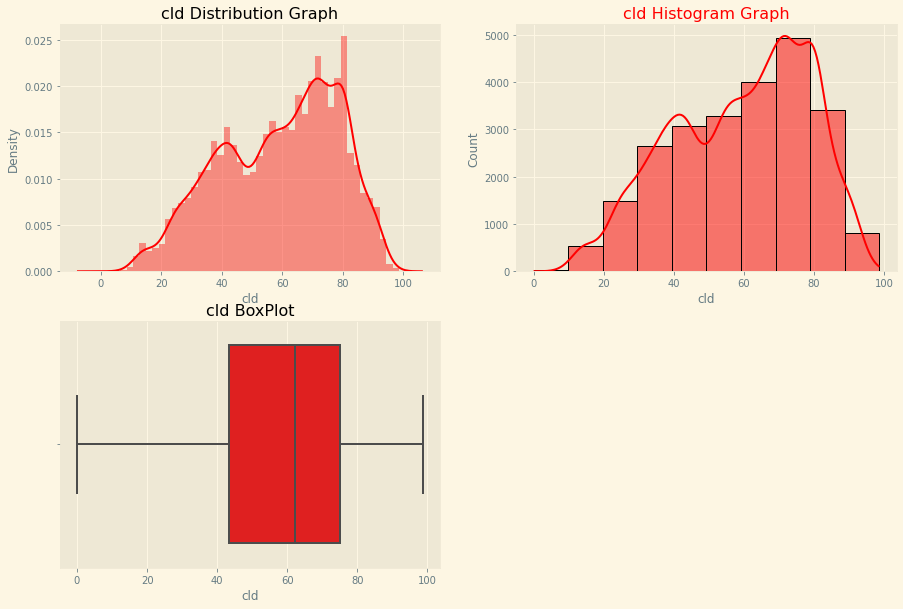

In [ ]:
plotGraph(df_lumpy,'cld')

In [ ]:
## the Observation for cld
# 1. the cld parameter values are look like not normally distrbuted. The values (max.data points parameter values) are inclined to right hand side.
# i.e the distrubution is negative skewed beacause the Mode > Median > Mean.
# 2. Beacause of one sided skewed like Mode is greated then may be we have some outliers in CLD featuer.
# 3.We have multiple bell curve.
# 4.In boxplot we don't have outlier's even the max. values are inclined to right had side.

### 4. dtr

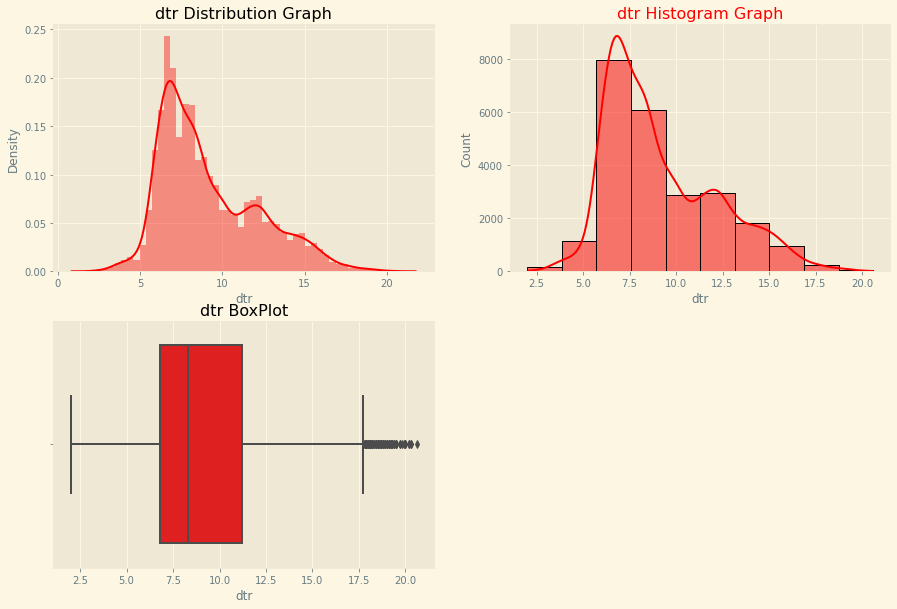

In [ ]:
plotGraph(df_lumpy,'dtr')

In [ ]:
## the Observation for dtr
# 1. the dtr parameter values are look like not normally distrbuted. The values (max.data points parameter values) are inclined to left hand side.
# i.e the distrubution is negative skewed beacause the Mode < Median < Mean.
# 3.We have multiple bell curve.
# 4.In boxplot we have outlier's in Upper Limit for dtr Features.

In [ ]:
df_lumpy.columns

Index(['Longitude', 'Latitude', 'region', 'country', 'reportingDate', 'cld',
       'dtr', 'frs', 'pet', 'pre', 'tmn', 'tmp', 'tmx', 'vap', 'wet',
       'elevation', 'dominant_land_cover', 'X5_Ct_2010_Da', 'X5_Bf_2010_Da',
       'lumpy', 'Year', 'Month', 'MonthTitle'],
      dtype='object')

In [ ]:
df_lumpy.head()

,Longitude,Latitude,region,country,reportingDate,cld,dtr,frs,pet,pre,tmn,tmp,tmx,vap,wet,elevation,dominant_land_cover,X5_Ct_2010_Da,X5_Bf_2010_Da,lumpy,Year,Month,MonthTitle
0,90.380931,22.437184,Asia,Bangladesh,2020-10-09,41.6,12.8,0.00,2.3,1.7,12.7,19.1,25.5,15.7,0.00,147,2,27970.983100,3691.746950,1,2020.0,10.0,October
1,87.854975,22.986757,Asia,India,2019-12-20,40.5,13.3,0.00,2.4,0.0,13.2,19.8,26.5,16.3,0.00,145,2,25063.646690,671.326701,1,2019.0,12.0,December
2,85.279935,23.610181,Asia,India,2019-12-20,27.3,13.6,0.08,2.3,0.6,9.4,16.2,23.0,13.0,0.98,158,2,6038.477155,1426.839831,1,2019.0,12.0,December
3,81.564510,43.882221,Asia,China,2019-10-25,45.3,12.8,31.00,0.4,8.8,-22.5,-16.1,-9.7,0.9,4.64,178,2,760.703340,0.000000,1,2019.0,10.0,October
4,81.161057,43.834976,Asia,China,2019-10-25,38.8,13.2,31.00,0.4,10.5,-20.4,-13.8,-7.2,1.2,1.69,185,3,270.367426,0.000000,1,2019.0,10.0,October


### 5.frs

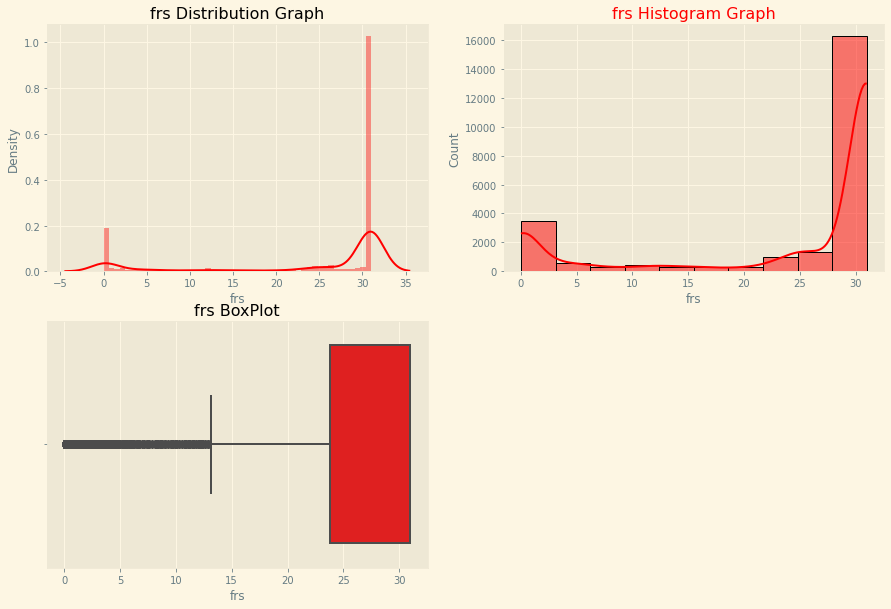

In [ ]:
plotGraph(df_lumpy,'frs')

In [ ]:
## the Observation for frs
# 1.the frs parameter values are look like not normally distrbuted. 
# 3.We have multiple bell curve.
# 4.In boxplot we have outlier's in lower Limit for dtr Features.
# 5.It looks like the data/value of frs features doesn't show the any pattern.

### 6.pet

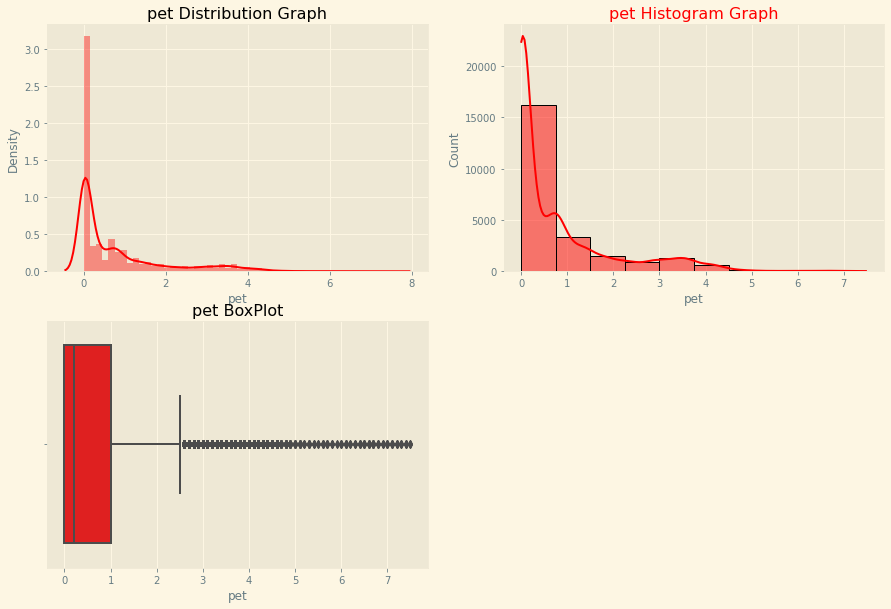

In [ ]:
plotGraph(df_lumpy,'pet')

In [ ]:
## the Observation for pet
# 1.The distribution of  Pet Feature are look like not normally distrbuted. 
# 2.The distribution skew/ inclinded towards left hand side i.e Positive skewed.
# 3.In boxplot we have outlier's in Upper Limit for dtr Features.

### 7.tmn

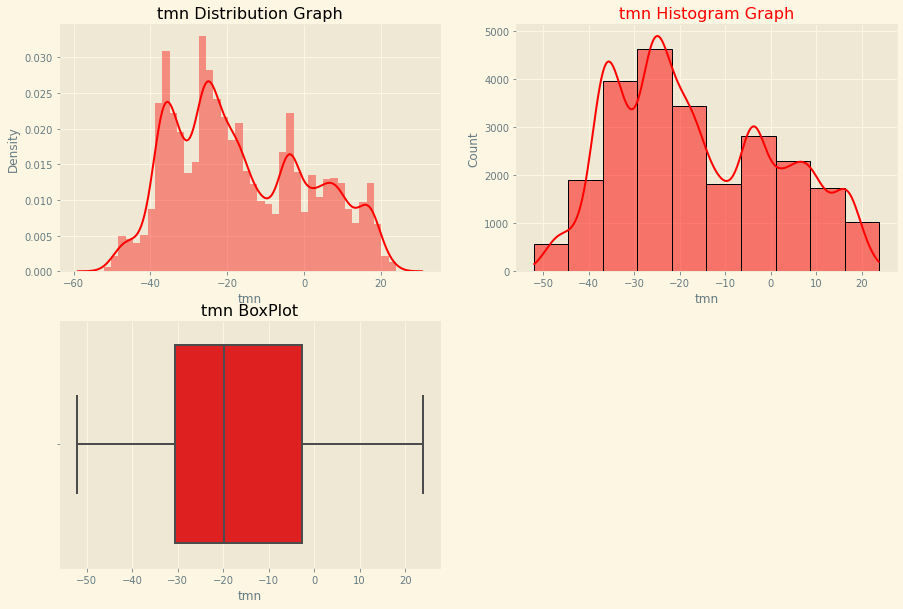

In [ ]:
plotGraph(df_lumpy,'tmn')

In [ ]:
## the Observation for tmn
# 1.The distribution of  tmn Feature are look like not normally distrbuted. 
# 2.we have lot of variations in distributions. 
# 3.The parameter values are Positive as well as Negative.In dataset we have most of the values in Negative as per Distrubution and histogram graph.
# 2.The distribution skew/ inclinded towards left hand side i.e Positive skewed.
# 3.In boxplot we don't have outlier's tmn Features.

### 8.tmp

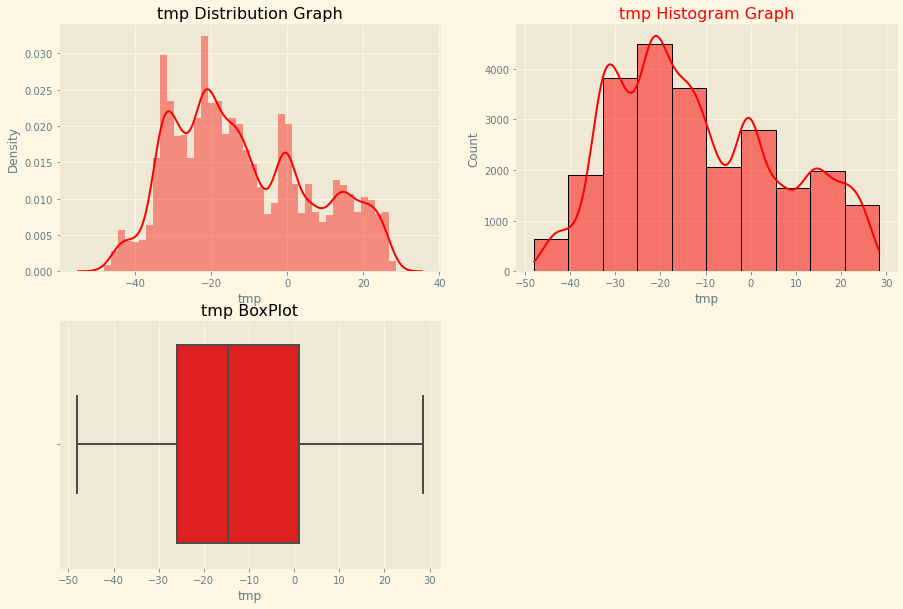

In [ ]:
plotGraph(df_lumpy,'tmp')

In [ ]:
## the Observation for tmp
# 1.The distribution of  tmp Feature are look like not normally distrbuted. 
# 2.we have lot of variations in distributions. 
# 3.The parameter values are Positive as well as Negative.In dataset we have most of the values in Negative as per Distrubution and histogram graph.
# 2.The distribution skew/ inclinded towards left hand side i.e Positive skewed.
# 3.In boxplot we don't have outlier's tmp Features.

### 9. tmx

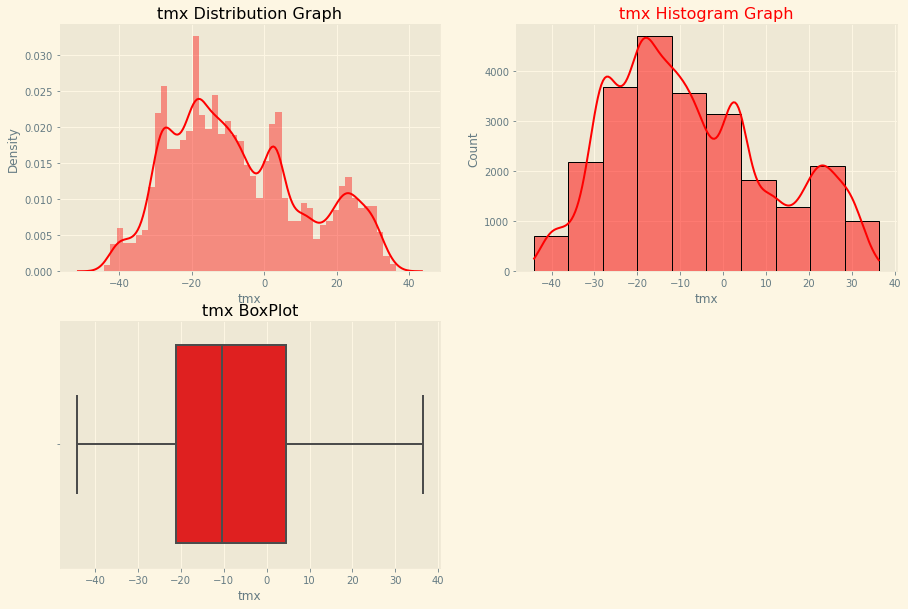

In [ ]:
plotGraph(df_lumpy,'tmx')

In [ ]:
## the Observation for tmx
# 1.The distribution of  tmx Feature are look like not normally distrbuted. 
# 2.we have lot of variations in distributions. 
# 3.The parameter values are Positive as well as Negative.In dataset we have most of the values in Negative as per Distrubution and histogram graph.
# 2.The distribution skew/ inclinded towards left hand side i.e Positive skewed.
# 3.In boxplot we don't have outlier's tmp Features.

### 10.vap

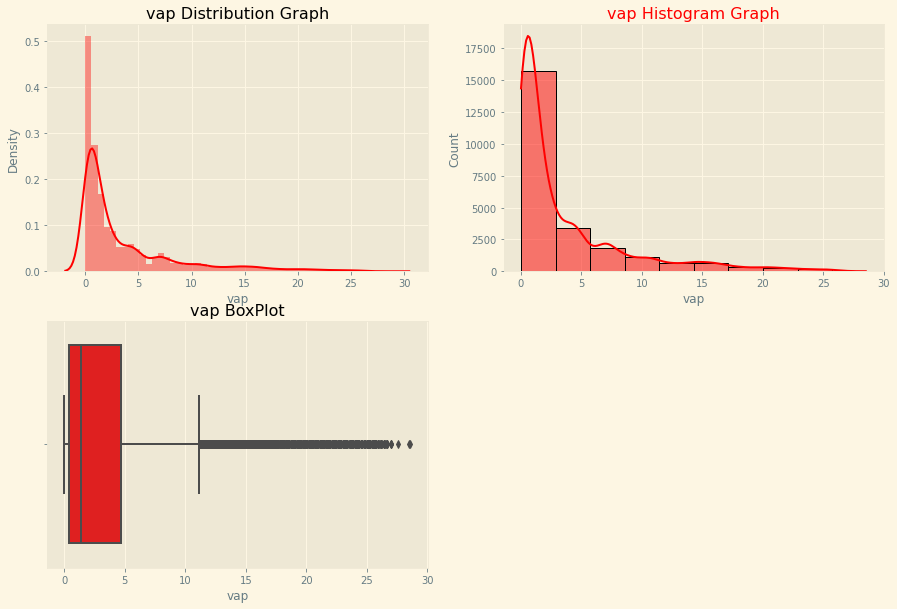

In [ ]:
plotGraph(df_lumpy,'vap')

In [ ]:
## the Observation for vap
# 1.The distribution of  Vap Feature are look like not normally distrbuted. 
# 2.The distribution skew/ inclinded towards left hand side i.e Positive skewed.
# 3.In boxplot we have outlier's in Upper Limit for dtr Features.

### 11.vap

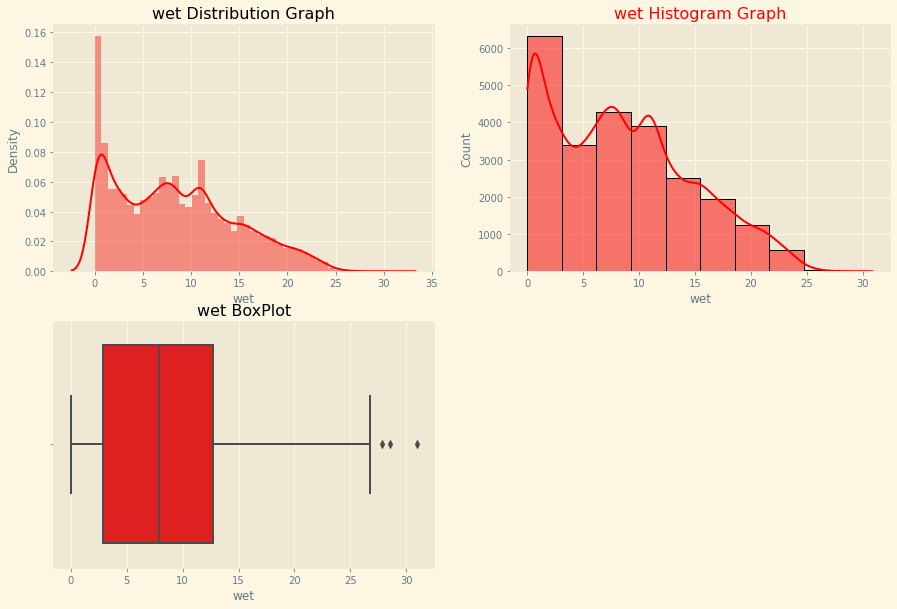

In [ ]:
plotGraph(df_lumpy,'wet')

In [ ]:
## the Observation for wer
# 1.The distribution of  Pet Feature are look like not normally distrbuted. 
# 2.The distribution skew/ inclinded towards left hand side i.e Positive skewed.
# 3.We have multiple bell curve in distribution,may be mode and median values are repeatating almost same.
# 3.In boxplot we have outlier's in Upper Limit for dtr Features.

### 12.elevation

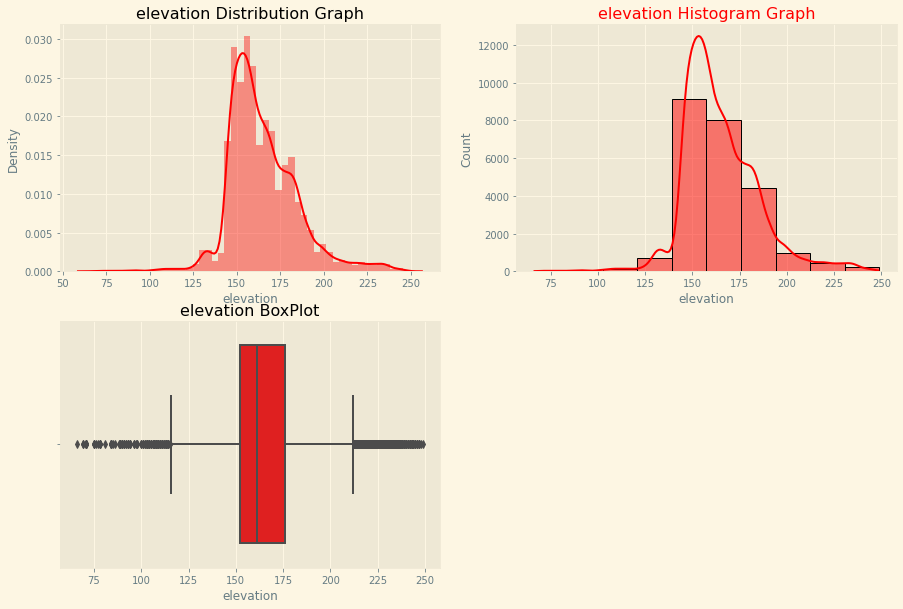

In [ ]:
plotGraph(df_lumpy,'elevation')

In [ ]:
## Observation of Elevation Feature
# 1.The distribution looks like it has kind of normal distribution.
# 2.We have outliers in both side i.e Lower and Upper Limit.

### 13.dominant_land_cover

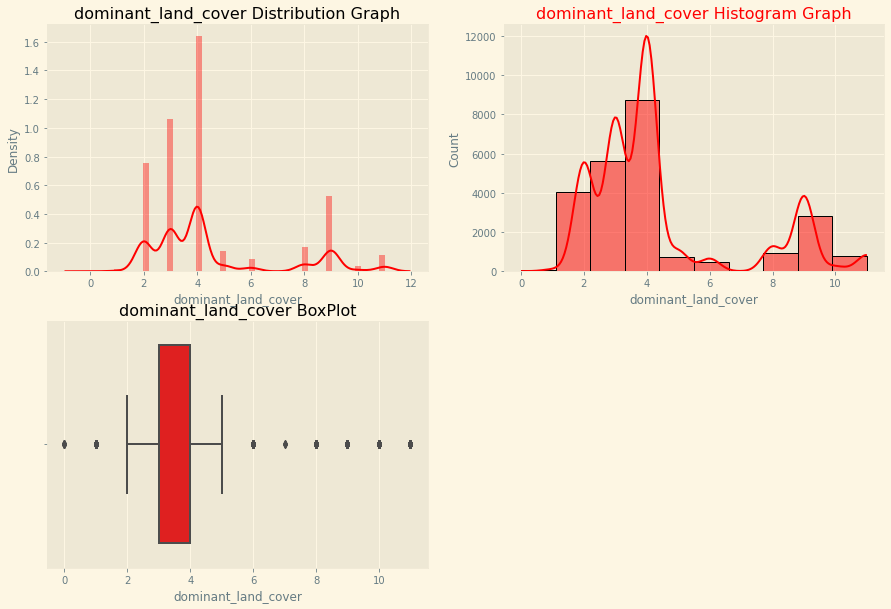

In [ ]:
plotGraph(df_lumpy,'dominant_land_cover')

In [ ]:
## Observation for dominant_land_cover
# 1.It is not normally distributed.
# 2.We can see the variations in parameter values.
# 3.We have outliers in dominant_land_cover features i.e Lower and Upper Limit.

### 14.X5_Ct_2010_Da

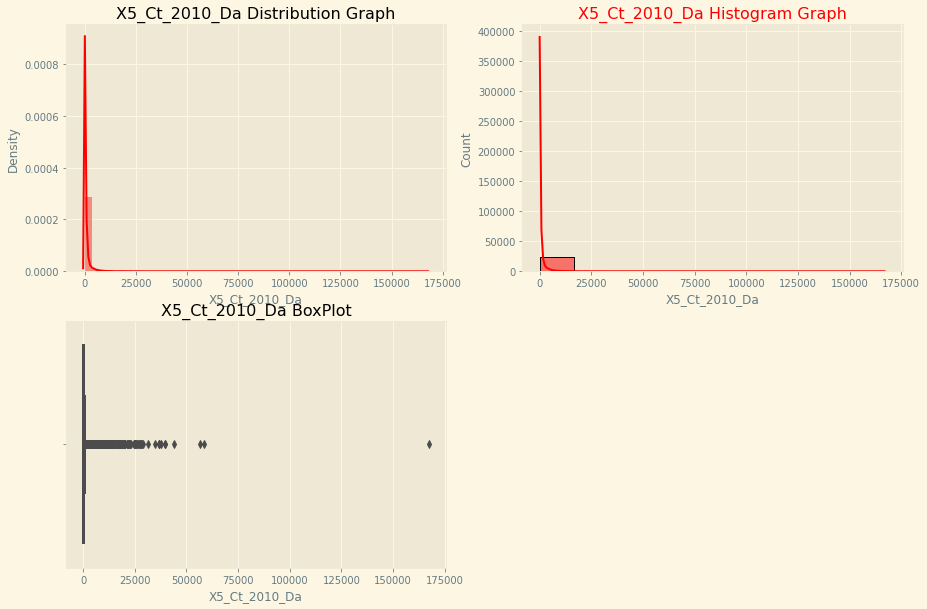

In [ ]:
plotGraph(df_lumpy,'X5_Ct_2010_Da')

In [ ]:
## Observation for X5_Ct_2010_Da
# 1.It is not normally distributed.
# 3.We have outliers in X5_Ct_2010_Da features i.e Upper Limit.

### 15.X5_Bf_2010_Da

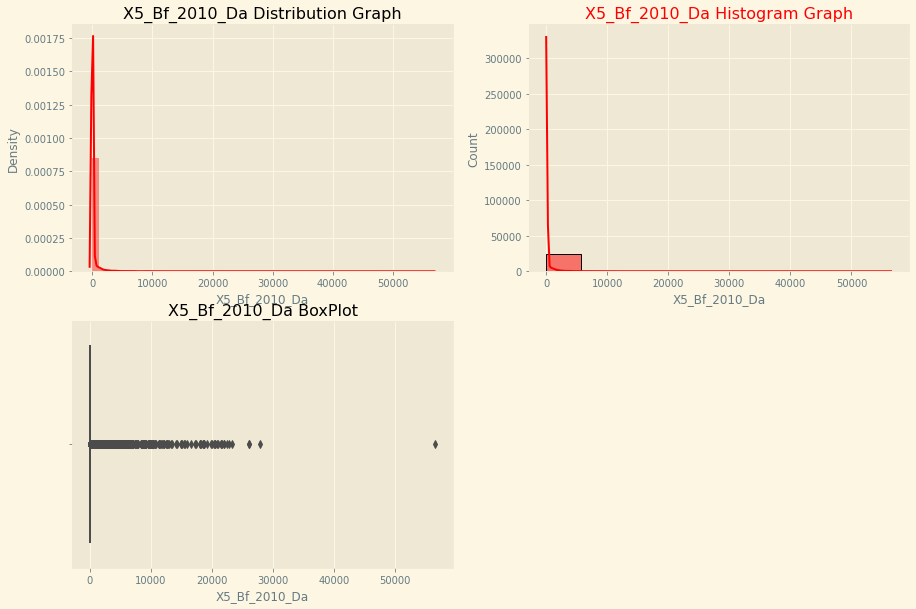

In [ ]:
plotGraph(df_lumpy,'X5_Bf_2010_Da')

In [ ]:
## Observation for X5_Bf_2010_Da
# 1.It is not normally distributed.
# 3.We have outliers in X5_Bf_2010_Da features i.e Upper Limit.

In [ ]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


### Bi- Varient Data Analysis

<h2> 1 .cld vs lumpy (Independent Vs Target Feature - Probability) </h2>

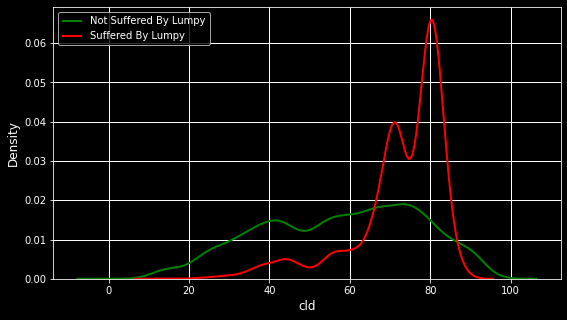

In [ ]:
plotChart(df_lumpy,'lumpy','cld')

<h1> Observation On above Chart.(For CLD) </h1>

<strong>The Probability is High <span style="color:green"> &#8657; For Not Suffered By Lumpy. </span> </strong>
    <div>
        <ol>
            <li> If the values are lie in between min value upto 65 (near by) </li>
            <li> If the values are lie in between 85 upto more than 100 (based on available dataset values) </li>
        </ol>
    </div>
<hr>        
<strong> The Probability is Low <span style="color:green"> &#8659; For Not Suffered By Lumpy.</span> </strong>    
    <div>
        <ol>
            <li>if the value lie between above 65 and less than or equal to 85</li>
        </ol>
    </div>
<hr>

<strong> The Probability is High <span style="color:red"> &#8657; For Suffered By Lumpy.</span> </strong>  
    <div>
        <ol>
            <li>
                If the values are lie in between 85 upto more than 100 (based on available dataset values)
            </li>
        </ol>
    </div>
<hr>    

<strong>The Probability is Low <span style="color:red"> &#8659; For Suffered By Lumpy. </span> </strong>
    <div>
        <ol>
            <li> If the values are lie in between min value upto 65 (near by) </li>
            <li> If the values are lie in between 85 upto more than 100 (based on available dataset values) </li>
        </ol>
    </div>

<h2> 2. dtr vs lumpy (Independent Vs Target Feature - Probability) </h1>

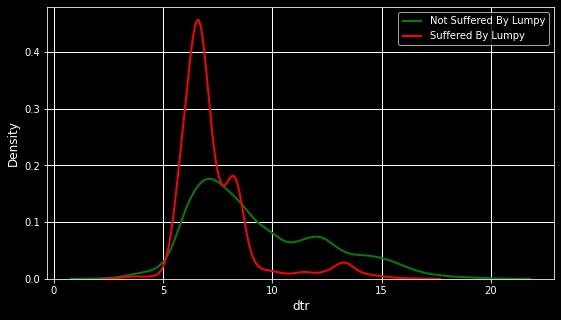

In [ ]:
plotChart(df_lumpy,'lumpy','dtr')

 <h1>Probability observation for dtr.</h1> 
 
  <strong> The Probability is High -<span style="color:green"> &#8657; For Not Suffered By Lumpy. </span></strong>
      <div>
            <ol>    
               <li>If the values are lie in-between 0 upto 6.  </li>
               <li>If the values are lie in-between 8 to 20.  </li>
            </ol>
      </div>
<hr> 
<strong> The Probability is Low <span style="color:green"> &#8659; For Not Suffered By Lumpy.</span> </strong>  
     <div>
         <ol>
               <li> If the values are lie in-between 6 to 8.</li>
         </ol>
    </div>
<hr>
<strong> The Probability is High <span style="color:red"> &#8657; For Suffered By Lumpy.</span> </strong> 
    <div>
         <ol>
              <li>If the values are lie in between 6 to 8 (near by).</li>
         </ol>     
    <div>  
<hr>        
<strong>The Probability is Low <span style="color:red"> &#8659; For Suffered By Lumpy. </span> </strong>
<div>
    <ol>
        <li>If the values are lie in-between 0 upto 6.</li>
        <li>If the values are lie in-between 8 to 20.</li>
    </ol>
<div>    

<h2> 3. frs vs lumpy (Independent Vs Target Feature - Probability) </h1>

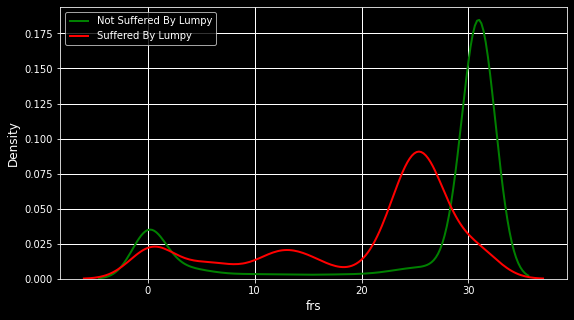

In [ ]:
plotChart(df_lumpy,'lumpy','frs')

<h1>Probability observations for frs parameter </h1>

<strong>The Probability is High <span style="color:green"> &#8657; For Not Suffered By Lumpy. </span> </strong>
    <div>
        <ol>
            <li>If the values are lie between near by 28 to 35 and more (based on current data)</li>
        </ol>
    </div>    
<hr>        
<strong> The Probability is Low <span style="color:green"> &#8659; For Not Suffered By Lumpy.</span> </strong>    
    <div>
        <ol>
            <li>if the value lie between above 1 and less than or equal to 27-28</li>
        </ol>
    </div>
<hr>
<strong> The Probability is High <span style="color:red"> &#8657; For Suffered By Lumpy.</span> </strong> 
    <div>
         <ol>
              <li>if the value lie between above 1 and less than or equal to 27-28</li>
         </ol>     
    <div>  
<hr>
        
<strong>The Probability is Low <span style="color:red"> &#8659; For Suffered By Lumpy. </span> </strong>
<div>
    <ol>
        <li>If the values are lie between near by 28 to 35 and more (based on current data)</li>
    </ol>
<div> 

<h2> 4. pet vs lumpy (Independent Vs Target Feature - Probability) </h1>

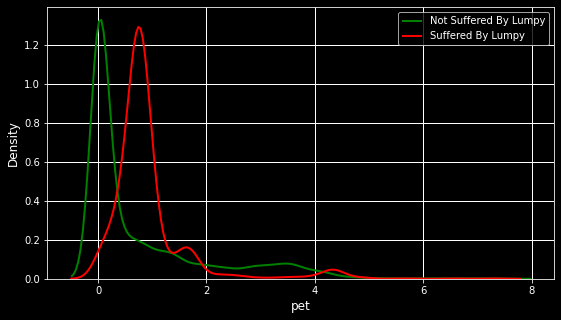

In [ ]:
plotChart(df_lumpy,'lumpy','pet')

<h1>Probability observations for pet parameter </h1>

<strong>The Probability is High <span style="color:green"> &#8657; For Not Suffered By Lumpy. </span> </strong>
    <div>
        <ol>
            <li>If the values are from 0 to 1 (based on current data)</li>
            <li>If the values are from 2 to 4 (based on current data)</li>
        </ol>
    </div>    
<hr>        
<strong> The Probability is Low <span style="color:green"> &#8659; For Not Suffered By Lumpy.</span> </strong>    
    <div>
        <ol>
            <li>if the value lie between 1 to 2</li>
        </ol>
    </div>
<hr>
<strong> The Probability is High <span style="color:red"> &#8657; For Suffered By Lumpy.</span> </strong> 
    <div>
         <ol>
              <li>if the value lie between 1 to 2</li>
         </ol>     
    <div>  
<hr>
        
<strong>The Probability is Low <span style="color:red"> &#8659; For Suffered By Lumpy. </span> </strong>
<div>
    <ol>
         <li>If the values are from 0 to 1 (based on current data)</li>
         <li>If the values are from 2 to 4 (based on current data)</li>
    </ol>
<div> 

<h2> 5. pre vs lumpy (Independent Vs Target Feature - Probability) </h2>

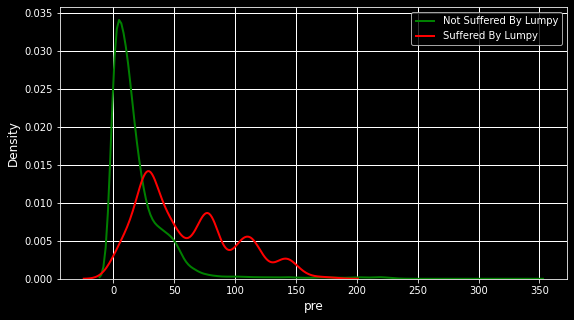

In [ ]:
plotChart(df_lumpy,'lumpy','pre')

<h1>Probability observations for per parameter </h1>

<strong>The Probability is High <span style="color:green"> &#8657; For Not Suffered By Lumpy. </span> </strong>
    <div>
        <ol>
            <li>If the values are from 0.1 to 25 near-by (based on current data)</li>
        </ol>
    </div>    
<hr>        
<strong> The Probability is Low <span style="color:green"> &#8659; For Not Suffered By Lumpy.</span> </strong>    
    <div>
        <ol>
            <li>If the value lie between 25  upto 350</li>
        </ol>
    </div>
<hr>
<strong> The Probability is High <span style="color:red"> &#8657; For Suffered By Lumpy.</span> </strong> 
    <div>
         <ol>
              <li>If the value lie between 25  upto 350</li>
         </ol>     
    <div>  
<hr>
        
<strong>The Probability is Low <span style="color:red"> &#8659; For Suffered By Lumpy. </span> </strong>
<div>
    <ol>
        <li>If the values are from 0.1 to 25 near-by (based on current data)</li>
    </ol>
<div> 

<h2> 6. tmn vs lumpy (Independent Vs Target Feature - Probability) </h2>

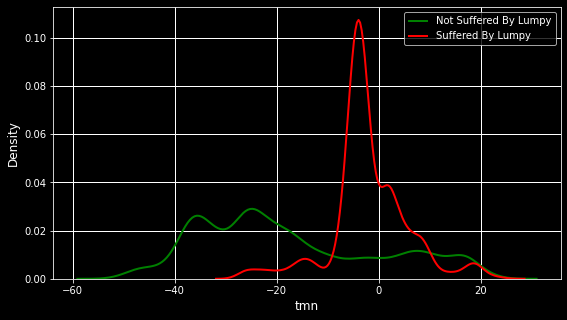

In [ ]:
plotChart(df_lumpy,'lumpy','tmn')

<h2> 7. tmp vs lumpy (Independent Vs Target Feature - Probability) </h2>

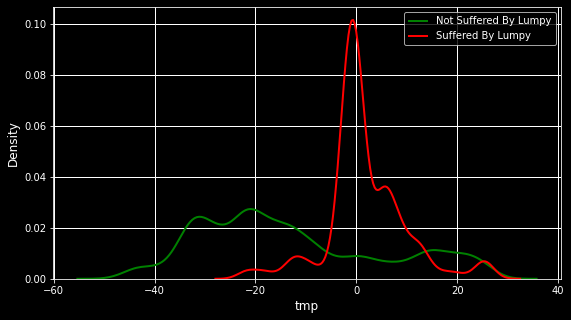

In [ ]:
plotChart(df_lumpy,'lumpy','tmp')

<h2> 8. tmx vs lumpy (Independent Vs Target Feature - Probability) </h2>

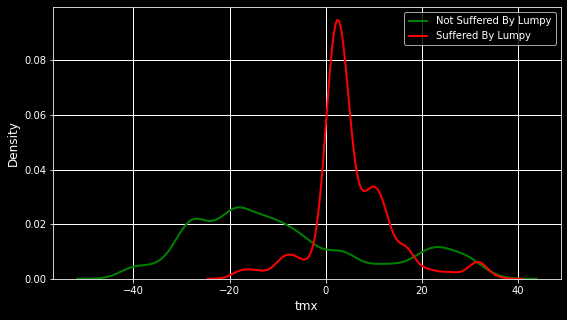

In [ ]:
plotChart(df_lumpy,'lumpy','tmx')

<h2> 9. vap vs lumpy (Independent Vs Target Feature - Probability) </h2>

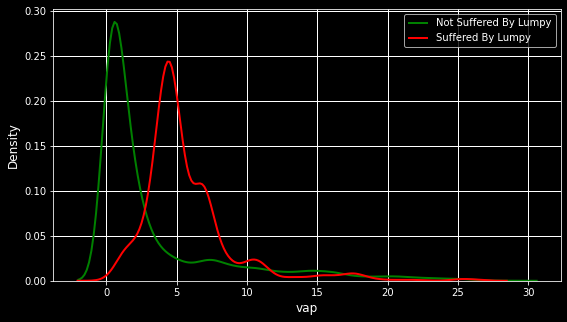

In [ ]:
plotChart(df_lumpy,'lumpy','vap')

<h2> 10. wet vs lumpy (Independent Vs Target Feature - Probability) </h2>

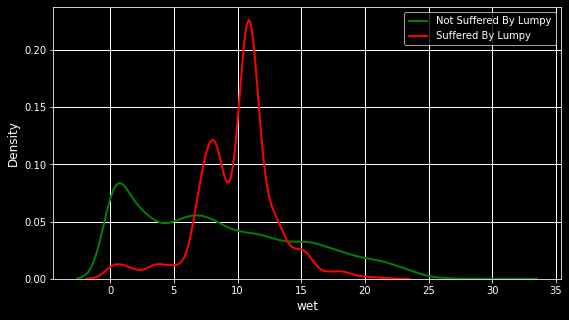

In [ ]:
plotChart(df_lumpy,'lumpy','wet')

<h2> 11. elevation vs lumpy (Independent Vs Target Feature - Probability) </h2>

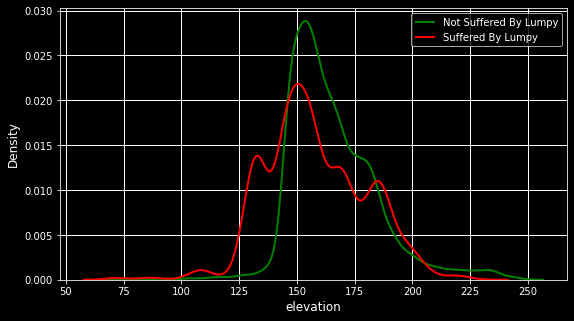

In [ ]:
plotChart(df_lumpy,'lumpy','elevation')

<h2> 12. dominant_land_cover vs lumpy (Independent Vs Target Feature - Probability) </h2>

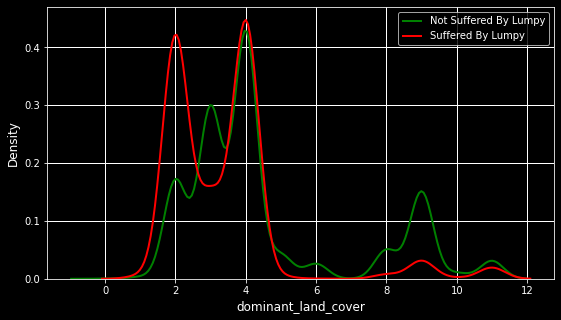

In [ ]:
plotChart(df_lumpy,'lumpy','dominant_land_cover')

###  Base Line Model

In [ ]:
## Decalre dependent and independent variables

#df_lumpy.columns

X = df_lumpy.drop(columns=['lumpy', 'Year', 'Month', 'MonthTitle','dominant_land_cover','reportingDate','region','country'])
y =df_lumpy[['lumpy']]


In [ ]:
y.head()

,lumpy
0,1
1,1
2,1
3,1
4,1


In [ ]:
## Import all Classification Algorithm

from sklearn.linear_model import LogisticRegression # Logistic Regression
from sklearn.neighbors  import KNeighborsClassifier # KNN Classifier
from sklearn.naive_bayes import GaussianNB # Naive bayes
from sklearn.tree import DecisionTreeClassifier ## Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC  # Super Vector Machine

In [ ]:
LR = LogisticRegression()
KNN = KNeighborsClassifier()
NB = GaussianNB()
DTree = DecisionTreeClassifier()
RF = RandomForestClassifier(n_estimators=500,random_state=42)
svc = SVC(kernel = 'poly')

In [ ]:
model = {
    "a":['LogisticRegression',LR],
    "b":['KNeighborsClassifier',KNN],
    "c":['GaussianNB',NB],
    "d":['DecisionTreeClassifier',DTree],
    "e":['RandomForestClassifier',RF],
    "f":['SVC',svc]
}

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.model_selection import KFold,cross_val_score
from sklearn.metrics import make_scorer,r2_score

In [ ]:
def test_model(model,X_train=X_train,y_train=y_train):
    cv = KFold(n_splits=7,shuffle=True,random_state=54)
    r2 = make_scorer(r2_score)
    r2_val_score = cross_val_score(model,X_train,y_train,cv=cv,scoring=r2)
    score=[r2_val_score.mean()]
    return score

In [ ]:
model_score = []
for mdl in model:
    print("Training Model",model[mdl][0])
    score = test_model(model[mdl][1],X_train,y_train)
    print('Score Of Model :',score)
    model_score.append([model[mdl][0],score])


Training Model LogisticRegression
Score Of Model : [0.2499311806941915]
Training Model KNeighborsClassifier
Score Of Model : [0.5732469921553991]
Training Model GaussianNB
Score Of Model : [0.016120341980212363]
Training Model DecisionTreeClassifier
Score Of Model : [0.6596735195697333]
Training Model RandomForestClassifier
Score Of Model : [0.6985799276044669]
Training Model SVC
Score Of Model : [-0.11238095782957723]
